<a href="https://colab.research.google.com/github/koushik2299/Phising-attack-detection/blob/main/Phising_attacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup and Libraries**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
import xgboost as xgb

In [2]:
df = pd.read_csv("/content/Phishing_Legitimate_full.csv")
odf = df

In [3]:
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


# **Cleaning**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [5]:
df.shape

(10000, 50)

The data set has 50 Columns and 10,000 Observations of phising which is a descent dataset

In [6]:
columns = df.columns
print(columns)

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

As our columns are all type of **64** if we could convert to **32** we can save 50% of memory usage so lets convert this into **Type 32**

In [7]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    if df[col].dtype == 'float64':
        df[col] = df[col].astype('float32')
    elif df[col].dtype == 'int64':
        df[col] = df[col].astype('int32')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int32  
 1   NumDots                             10000 non-null  int32  
 2   SubdomainLevel                      10000 non-null  int32  
 3   PathLevel                           10000 non-null  int32  
 4   UrlLength                           10000 non-null  int32  
 5   NumDash                             10000 non-null  int32  
 6   NumDashInHostname                   10000 non-null  int32  
 7   AtSymbol                            10000 non-null  int32  
 8   TildeSymbol                         10000 non-null  int32  
 9   NumUnderscore                       10000 non-null  int32  
 10  NumPercent                          10000 non-null  int32  
 11  NumQueryComponents                  10000 

Hence we can see that the memory usage has been cutdown from 3.8mb to 1.9mb because of this.

## **Handling Missing Values**


In [8]:
df.isna().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


There are no missing values in the dataset

## **Duplicate Values**

In [9]:
df.duplicated().sum()

0

Number of Duplicate Values in the Dataset are 0

## Unique Values in the Dataset

In [10]:
for col in df.columns:
    unique_values = df[col].explode().unique()
    if len(unique_values) > 10:
        print(f"{col} has {len(unique_values)} unique values")
    else:
        print(f"{col} contains: {', '.join(map(str, unique_values))}")


id has 10000 unique values
NumDots has 17 unique values
SubdomainLevel has 13 unique values
PathLevel has 18 unique values
UrlLength has 226 unique values
NumDash has 25 unique values
NumDashInHostname contains: 0, 1, 2, 4, 3, 5, 7, 6, 9, 8
AtSymbol contains: 0, 1
TildeSymbol contains: 0, 1
NumUnderscore has 16 unique values
NumPercent has 14 unique values
NumQueryComponents has 19 unique values
NumAmpersand has 16 unique values
NumHash contains: 0, 1
NumNumericChars has 82 unique values
NoHttps contains: 1, 0
RandomString contains: 0, 1
IpAddress contains: 0, 1
DomainInSubdomains contains: 0, 1
DomainInPaths contains: 0, 1
HttpsInHostname contains: 0
HostnameLength has 74 unique values
PathLength has 147 unique values
QueryLength has 164 unique values
DoubleSlashInPath contains: 0, 1
NumSensitiveWords contains: 0, 1, 2, 3
EmbeddedBrandName contains: 0, 1
PctExtHyperlinks has 2510 unique values
PctExtResourceUrls has 1489 unique values
ExtFavicon contains: 1, 0
InsecureForms contains: 


The explode() function is a method provided by pandas, a popular data manipulation library in Python. It is used to transform elements of a list-like object within a pandas Series into separate rows, effectively "exploding" the list-like object.

The functionality of explode() is particularly useful when dealing with columns containing lists, arrays, or other iterable objects. When you apply explode() to such a column, it will create a new row for each element in the list, while duplicating the rest of the data in the other columns. This makes it easier to perform operations on individual elements within the list-like objects.

As we can see the **Https in Host name** is an unwanted information because it contains nothing other than 0's so we can drop this column.

In [32]:
df.drop("HttpsInHostname",axis=1,inplace=True)

# **EDA**

Our Target variable is Class Label Lets See the distribution of the column

In [11]:
df1 = df['CLASS_LABEL'].value_counts()
print(df1)

1    5000
0    5000
Name: CLASS_LABEL, dtype: int64


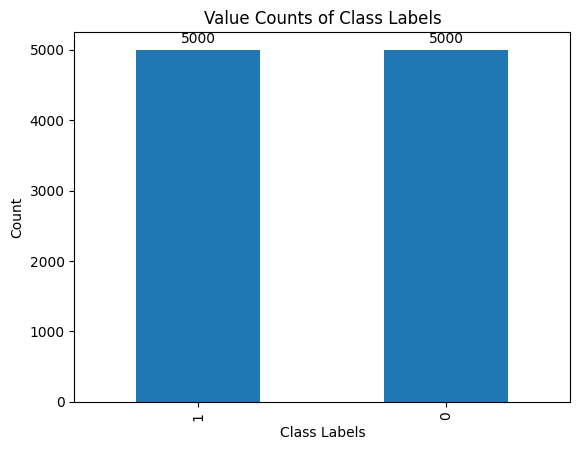

In [12]:
df1 = df['CLASS_LABEL'].value_counts()
df1.plot(kind='bar')

for i, label in enumerate(df1):
  plt.annotate(label,(i,df1[i]),textcoords="offset points", xytext=(0, 5), ha='center')

plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Value Counts of Class Labels')
plt.show()

Enumrate method helps in making a pointer for the count of iterations. i.e, the first reference in the for loop refers to count and the next point refers to value of the list or actual pointer

Our Dataset is Balanced Dataset it contains equal number of 0's and 1's

In [33]:
df.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HostnameLength', 'PathLength',
       'QueryLength', 'DoubleSlashInPath', 'NumSensitiveWords',
       'EmbeddedBrandName', 'PctExtHyperlinks', 'PctExtResourceUrls',
       'ExtFavicon', 'InsecureForms', 'RelativeFormAction', 'ExtFormAction',
       'AbnormalFormAction', 'PctNullSelfRedirectHyperlinks',
       'FrequentDomainNameMismatch', 'FakeLinkInStatusBar',
       'RightClickDisabled', 'PopUpWindow', 'SubmitInfoToEmail',
       'IframeOrFrame', 'MissingTitle', 'ImagesOnlyInForm', 'SubdomainLevelRT',
       'UrlLengthRT', 'PctExtResourceUrlsRT', 'AbnormalExtFormActionR',
       'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHyperlinksRT',
       'CLASS_LAB

In [34]:
numeric_cols = df.columns[df.dtypes!='object']
categorical_cols = df.columns[df.dtypes=='object']
print("Number of Numerical Cols",len(numeric_cols),numeric_cols)
print("Number of Catageroical Cols",len(categorical_cols),categorical_cols)

Number of Numerical Cols 49 Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HostnameLength', 'PathLength',
       'QueryLength', 'DoubleSlashInPath', 'NumSensitiveWords',
       'EmbeddedBrandName', 'PctExtHyperlinks', 'PctExtResourceUrls',
       'ExtFavicon', 'InsecureForms', 'RelativeFormAction', 'ExtFormAction',
       'AbnormalFormAction', 'PctNullSelfRedirectHyperlinks',
       'FrequentDomainNameMismatch', 'FakeLinkInStatusBar',
       'RightClickDisabled', 'PopUpWindow', 'SubmitInfoToEmail',
       'IframeOrFrame', 'MissingTitle', 'ImagesOnlyInForm', 'SubdomainLevelRT',
       'UrlLengthRT', 'PctExtResourceUrlsRT', 'AbnormalExtFormActionR',
       'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHype

So all of the columns that we have are Numeric

In [35]:
def separate_discrete_continuous(df):
    discrete_columns = []
    continuous_columns = []

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            if len(df[col].unique()) <= 10:  # A threshold to identify discrete columns (you can adjust this as needed)
                discrete_columns.append(col)
            else:
                continuous_columns.append(col)
        else:
            discrete_columns.append(col)

    return discrete_columns, continuous_columns

In [36]:
descrete,continuous=separate_discrete_continuous(df)
print(descrete)
print(continuous)

['NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumHash', 'NoHttps', 'RandomString', 'IpAddress', 'DomainInSubdomains', 'DomainInPaths', 'DoubleSlashInPath', 'NumSensitiveWords', 'EmbeddedBrandName', 'ExtFavicon', 'InsecureForms', 'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction', 'FrequentDomainNameMismatch', 'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow', 'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle', 'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT', 'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHyperlinksRT', 'CLASS_LABEL']
['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash', 'NumUnderscore', 'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumNumericChars', 'HostnameLength', 'PathLength', 'QueryLength', 'PctExtHyperlinks', 'PctExtResourceUrls', 'PctNullSelfRedirectHyperlinks']


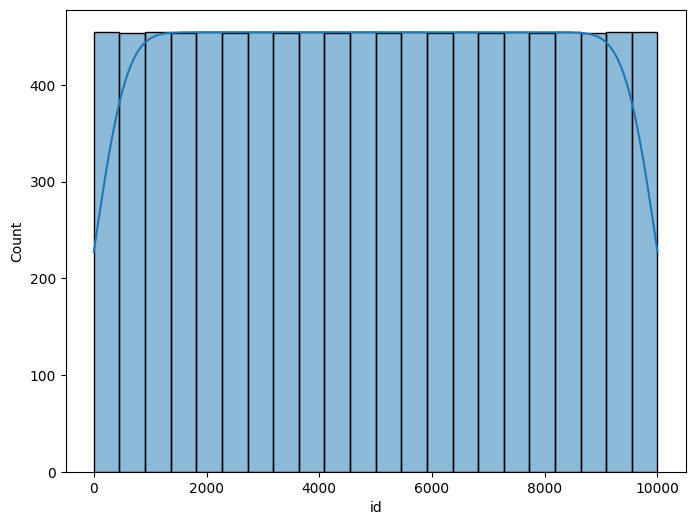

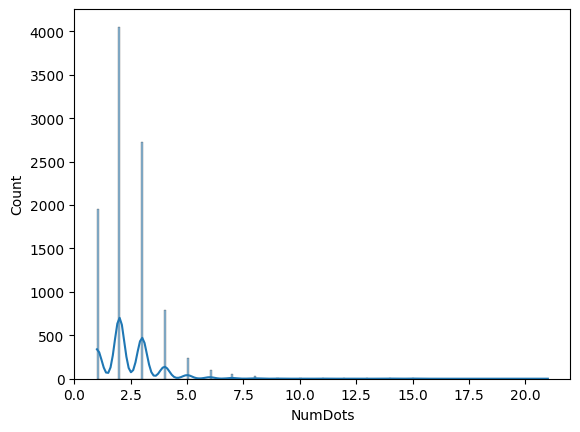

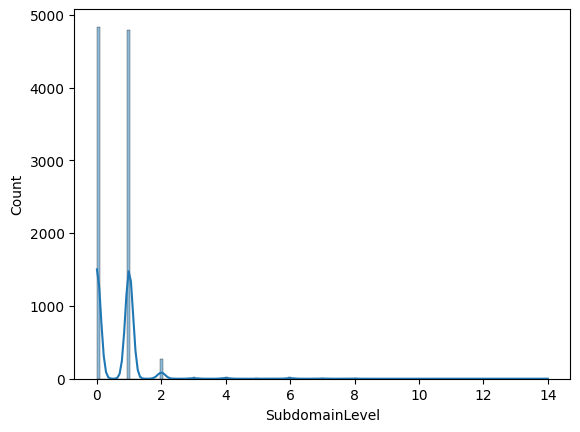

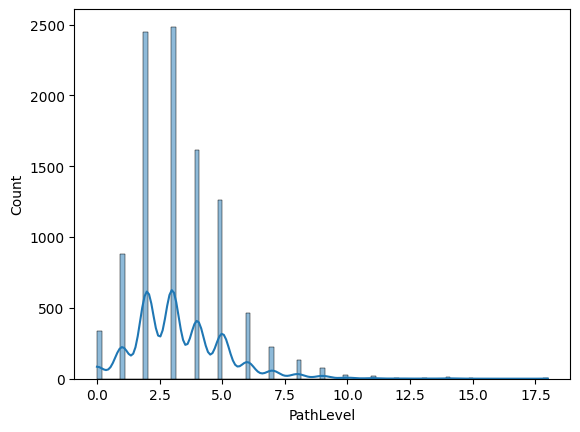

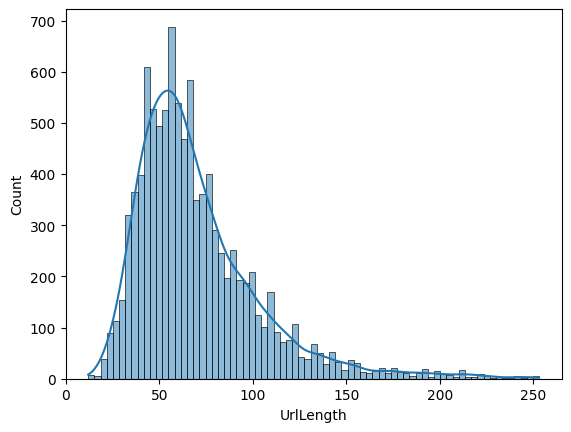

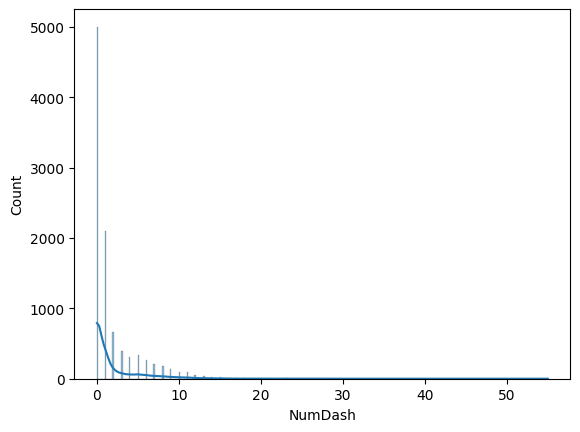

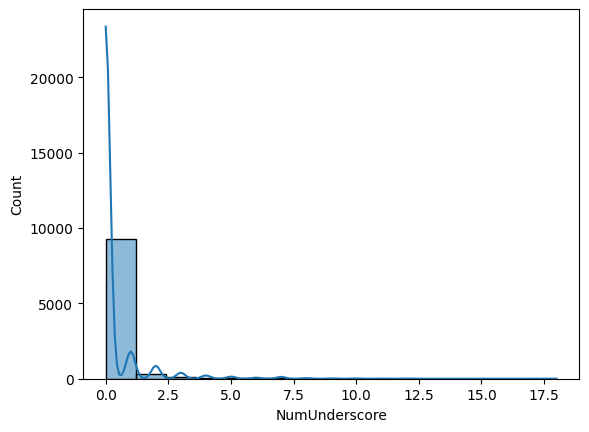

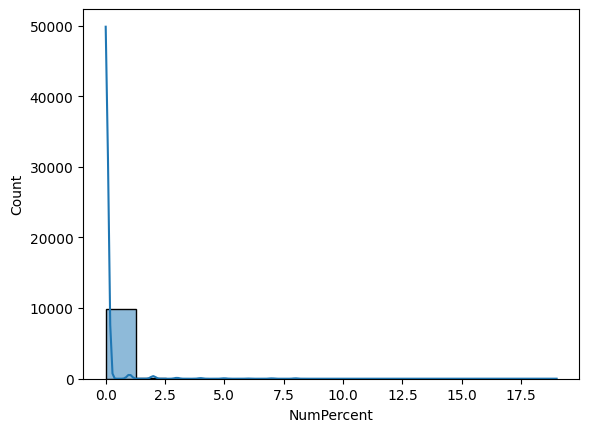

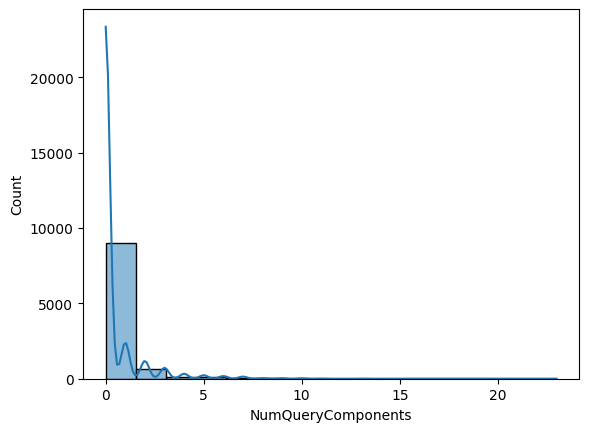

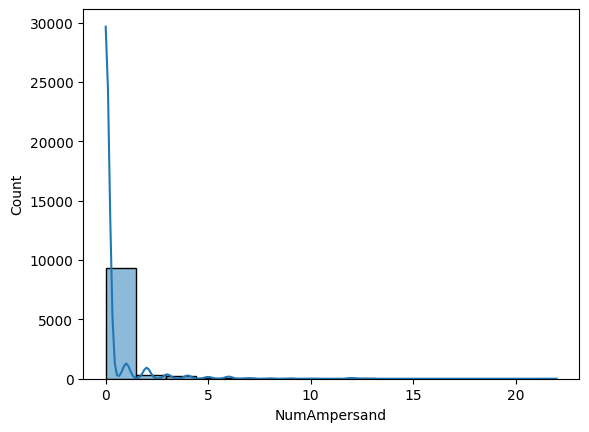

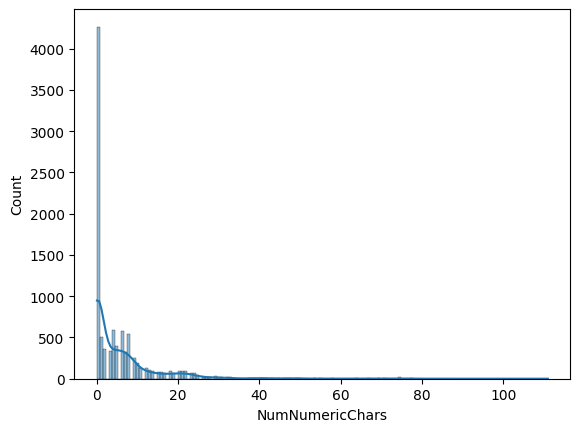

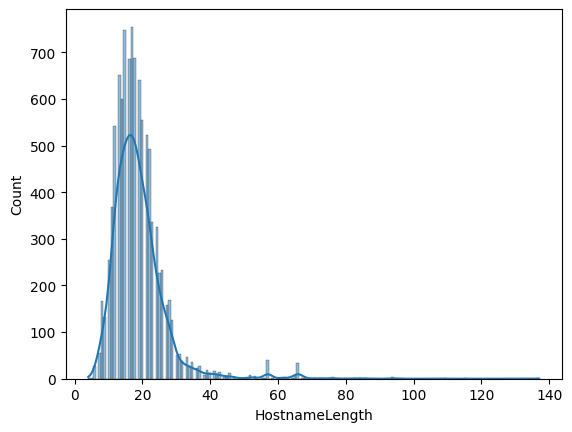

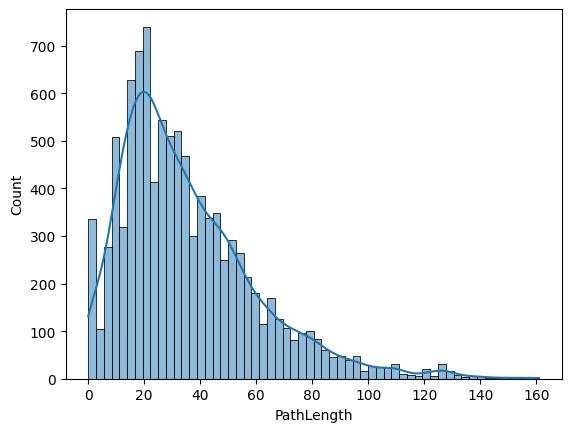

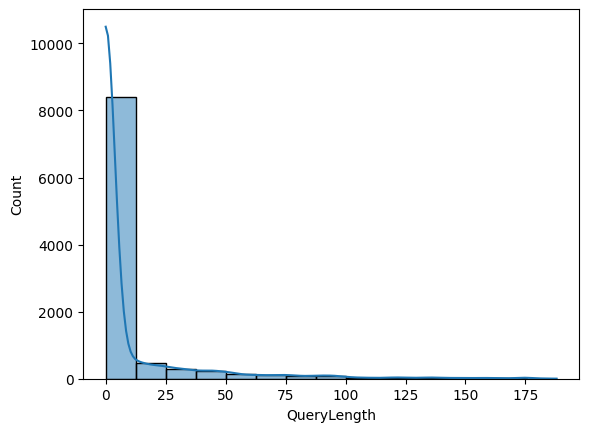

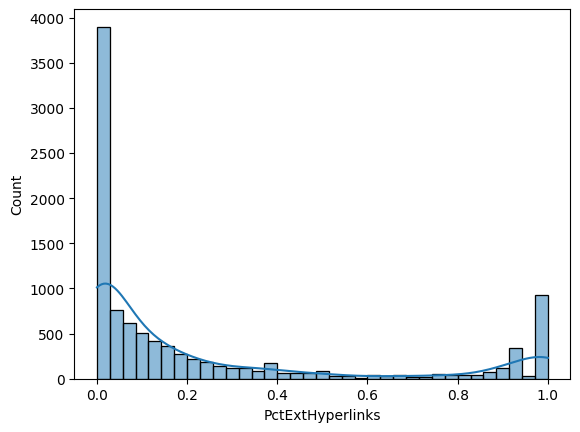

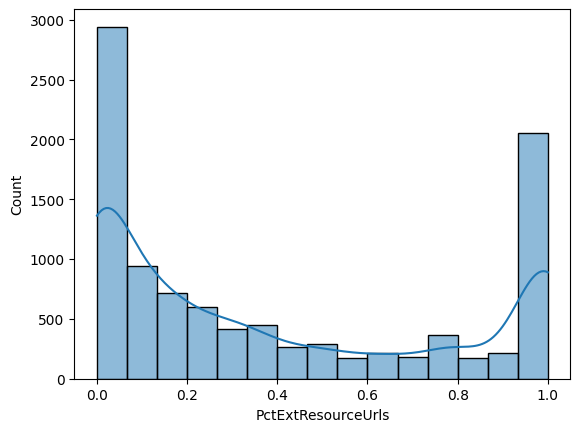

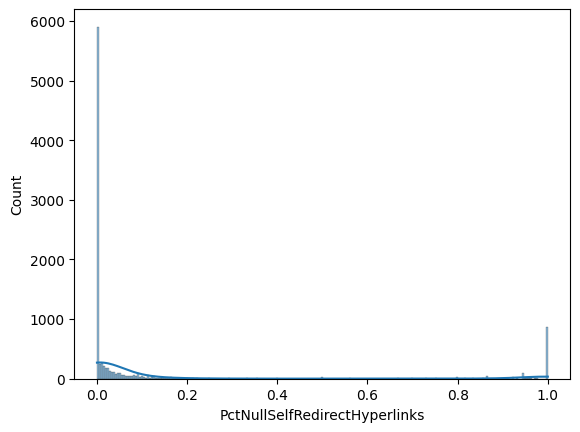

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in continuous:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

Distribution of all the **Numerical Columns** of the DataSet

To aviod redudant data lets Remove the columns which are corelated more

In [42]:
df_temp = pd.DataFrame(df[numeric_cols].corr())
for i in numeric_cols:
  for j in numeric_cols:
    if(i!=j):
      if(df_temp.loc[i][j]>=0.80):
        print(i,":",df_temp.loc[i][j],":",j)

NumQueryComponents : 0.8729512128487915 : NumAmpersand
NumQueryComponents : 0.8117844213519015 : QueryLength
NumAmpersand : 0.8729512128487915 : NumQueryComponents
QueryLength : 0.8117844213519015 : NumQueryComponents


As we can see the "NumQueryComponents" is redundant information as it is corealted for both the NumApersand and Query Length

In [43]:
df.drop("NumQueryComponents",axis=1,inplace=True)

Lets Check if there is any other Reduandant information in the Dataset

In [46]:
df_temp = pd.DataFrame(df.corr())
for i in df.columns:
  for j in df.columns:
    if(i!=j):
      if(df_temp.loc[i][j]>=0.80):
        print(i,":",df_temp.loc[i][j],":",j)

Now there are no columns that have corelation that 80%

In [47]:
df.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumAmpersand', 'NumHash', 'NumNumericChars', 'NoHttps',
       'RandomString', 'IpAddress', 'DomainInSubdomains', 'DomainInPaths',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperlinksRT', 'CLASS_LABEL'],
      dtype='object')

# **Modelling**

In [51]:
features = df.drop('CLASS_LABEL',axis=1)
target = df['CLASS_LABEL']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [59]:
import time
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test, models, model_list, accuracy_list are defined and populated from the previous code

train_time_list = []

for model_name, model in models.items():
    start_time = time.time()  # Record the start time

    model.fit(X_train, y_train)

    end_time = time.time()  # Record the end time
    train_time = end_time - start_time  # Calculate the training time

    # Make Predictions
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use weighted F1-score for multi-class classification

    print(model_name)
    model_list.append(model_name)

    print('Model Training Performance')
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Training Time:", train_time, "seconds")

    accuracy_list.append(accuracy)
    f1_score_list.append(f1)
    train_time_list.append(train_time)

    print('=' * 35)
    print('\n')


XGB
Model Training Performance
Accuracy: 1.0
F1 Score: 1.0
Training Time: 0.4364314079284668 seconds


DecisionTree
Model Training Performance
Accuracy: 1.0
F1 Score: 1.0
Training Time: 0.016453027725219727 seconds


RandomForest
Model Training Performance
Accuracy: 1.0
F1 Score: 1.0
Training Time: 0.6122779846191406 seconds


LogisticRegression
Model Training Performance
Accuracy: 0.971
F1 Score: 0.9710035874530173
Training Time: 0.12530779838562012 seconds




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier
Model Training Performance
Accuracy: 1.0
F1 Score: 1.0
Training Time: 0.9152610301971436 seconds


AdaBoostClassifier
Model Training Performance
Accuracy: 1.0
F1 Score: 1.0
Training Time: 0.018268585205078125 seconds


KNeighborsClassifier
Model Training Performance
Accuracy: 1.0
F1 Score: 1.0
Training Time: 0.009001970291137695 seconds


GaussianNB
Model Training Performance
Accuracy: 0.922
F1 Score: 0.9219577677224736
Training Time: 0.010857820510864258 seconds


SVC
Model Training Performance
Accuracy: 0.9996666666666667
F1 Score: 0.9996666693719721
Training Time: 0.22304081916809082 seconds




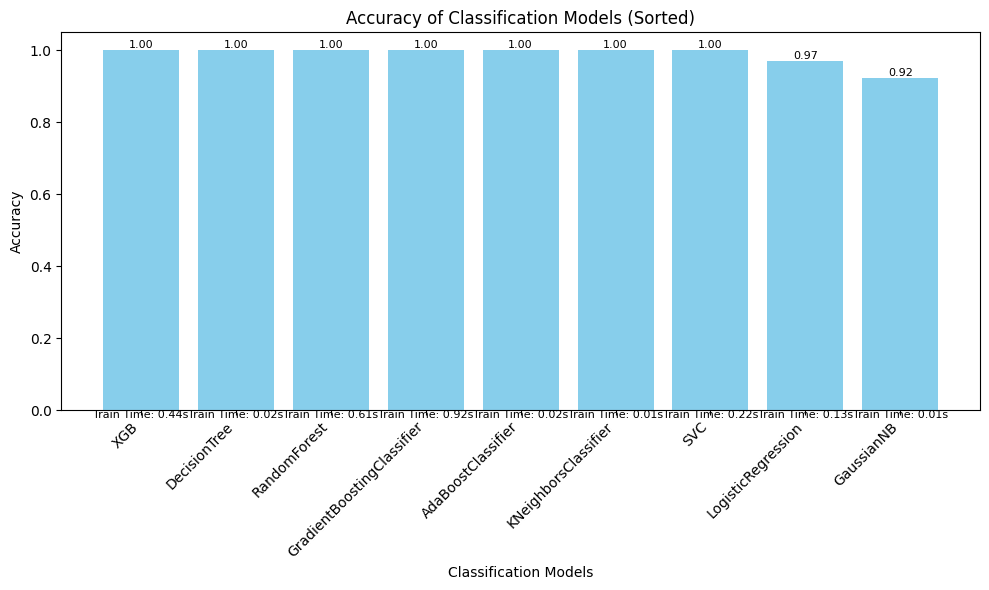

In [60]:
# Zip model_list, accuracy_list, and train_time_list together and sort them based on the accuracy values
sorted_data = sorted(zip(model_list, accuracy_list, train_time_list), key=lambda x: x[1], reverse=True)
sorted_model_list, sorted_accuracy_list, sorted_train_time_list = zip(*sorted_data)

plt.figure(figsize=(10, 6))
plt.bar(sorted_model_list, sorted_accuracy_list, color='skyblue')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Classification Models (Sorted)')
plt.xticks(rotation=45, ha='right')

# Adding the accuracy values on top of the bars
for i, v in enumerate(sorted_accuracy_list):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=8, color='black')

# Adding the training time as a label below each bar
for i, t in enumerate(sorted_train_time_list):
    plt.text(i, 0, f"Train Time: {t:.2f}s", ha='center', va='top', fontsize=8, color='black')

plt.tight_layout()
plt.show()